<a href="https://colab.research.google.com/github/rohanriku/ML-DL/blob/master/linear_regression_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [0]:
#Global variables to keep track of the parameters
theta0 = 0
theta1 = 1
theta0_history = list()
theta1_history = list()

In [0]:
#Calculating cost
def cost(x, y):
  return (1/(2 * len(x))) * np.sum(np.square(x - y))

In [0]:
#Calculating the hypothesis function
def hypothesis(x):
  return theta0 + np.multiply(theta1, x)

In [0]:
#Gradient descent with simultaneous parameter update
def gradient_descent(x, y, alpha):
  temp0 = (1/len(x)) * np.sum(hypothesis(x) - y) 
  temp1 = (1/len(x)) * np.sum(np.multiply((hypothesis(x) - y), x))
  global theta0
  global theta1
  theta0 = theta0 - alpha * temp0
  theta1 = theta1 - alpha * temp1
  theta0_history.append(theta0)
  theta1_history.append(theta1) 

In [0]:
#Load the train and test set
train_set = pd.read_csv('sample_data/california_housing_train.csv')
test_set = pd.read_csv('sample_data/california_housing_test.csv')

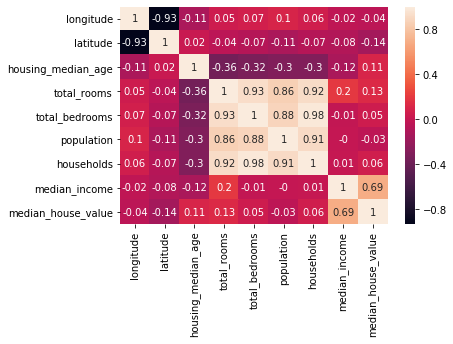

In [7]:
#Finding out the highest correlation
correlation_matrix = train_set.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

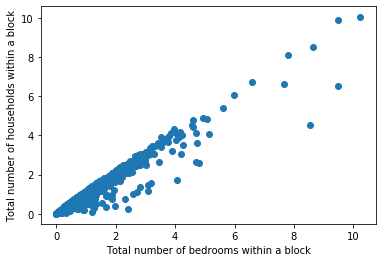

In [8]:
#Normalizing the data
train_set.households = train_set.households / np.mean(train_set.households)
test_set.households = test_set.households / np.mean(test_set.households)

train_set.total_bedrooms = train_set.total_bedrooms / np.mean(train_set.total_bedrooms)
test_set.total_bedrooms  = test_set.total_bedrooms / np.mean(test_set.total_bedrooms)

plt.scatter(test_set.total_bedrooms,test_set.households)
plt.xlabel('Total number of bedrooms within a block')
plt.ylabel('Total number of households within a block')
plt.show()

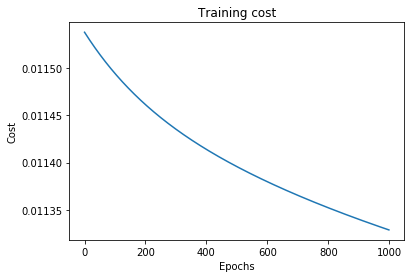

In [9]:
#Training the model for 1000 epochs
cost_history = list()
epochs = list()

for epoch in range(0, 1000):
  gradient_descent(train_set.total_bedrooms, train_set.households, 0.001)
  cost_history.append(cost(hypothesis(train_set.total_bedrooms), train_set.households))
  epochs.append(epoch)

plt.plot(epochs, cost_history)
plt.title('Training cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

Cost:  0.01731856687951555


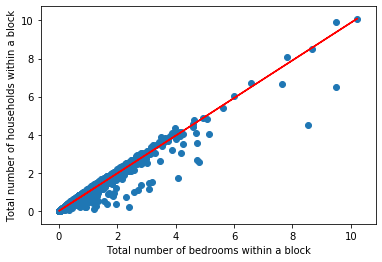

In [10]:
#Test set prediction
predictions = hypothesis(test_set.total_bedrooms)
print("Cost: ", cost(predictions,test_set.households))
plt.plot(test_set.total_bedrooms, predictions, color='r')
plt.scatter(test_set.total_bedrooms, test_set.households)
plt.xlabel('Total number of bedrooms within a block')
plt.ylabel('Total number of households within a block')
plt.show()

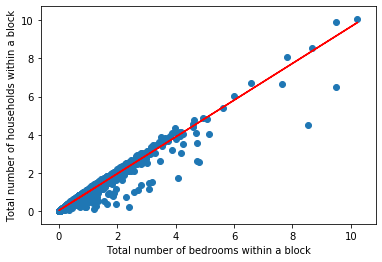

Cost:  0.016514461575858376
LinearRegression() computed parameters:  [[0.         0.96304389]]
Implementation parameters:  0.0053502004845376785 0.9873531836173519


In [11]:
#Sanity check using library
reg = LinearRegression()
ones=np.ones((len(train_set),1))

train_x = np.array(train_set.total_bedrooms)
train_x = train_x.reshape(-1,1)
train_x = np.append(ones,train_x,axis=1)

train_y = np.array(train_set.households)
train_y = train_y.reshape(-1,1)
ones=np.ones((len(test_set),1))
test_x = np.array(test_set.total_bedrooms)
test_x = test_x.reshape(-1, 1)
test_x = np.append(ones,test_x,axis=1)
test_y = np.array(test_set.households)
test_y = test_y.reshape(-1, 1)
reg.fit(train_x, train_y)
predict_y = reg.predict(test_x)

plt.plot(test_set.total_bedrooms, predict_y, color='r')
plt.scatter(test_set.total_bedrooms, test_set.households)
plt.xlabel('Total number of bedrooms within a block')
plt.ylabel('Total number of households within a block')
plt.show()
print("Cost: ", cost(predict_y,test_y))
print("LinearRegression() computed parameters: ", reg.coef_)
print("Implementation parameters: ", theta0, theta1)